In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("loan_sanction_train.csv")

In [8]:
df.shape

(614, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.columns = map(str.lower,df.columns)

In [12]:
df.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [13]:
df.isna().sum(axis=1).sum()

149

In [14]:
df['loan_status'].value_counts()

loan_status
Y    422
N    192
Name: count, dtype: int64

#### Split the dataset into train and test before exploring

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X, y = df.drop(['loan_status'],axis=1), df['loan_status']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [18]:
print(y_train.value_counts()/y_train.count(),y_test.value_counts()/y_test.count())

loan_status
Y    0.684318
N    0.315682
Name: count, dtype: float64 loan_status
Y    0.699187
N    0.300813
Name: count, dtype: float64


In [19]:
X_train.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
261,LP001868,Male,No,0,Graduate,No,2060,2209.0,134.0,360.0,1.0,Semiurban
459,LP002473,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban
441,LP002409,Male,Yes,0,Graduate,No,7901,1833.0,180.0,360.0,1.0,Rural
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural
461,LP002484,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban


In [20]:
X_train['property_area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

# 1. Preprocessing

### 1.1 Encoding of nominal features

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
nominal_features = ['gender','married','self_employed','property_area','credit_history']

In [23]:
nominal_encoder = OneHotEncoder(drop=['Female','No','No','Rural',0])

In [24]:
nominal_encoded = nominal_encoder.fit_transform(X_train[nominal_features]).toarray()
nominal_encoder.get_feature_names_out()

array(['gender_Male', 'gender_nan', 'married_Yes', 'married_nan',
       'self_employed_Yes', 'self_employed_nan',
       'property_area_Semiurban', 'property_area_Urban',
       'credit_history_1.0', 'credit_history_nan'], dtype=object)

In [25]:
X_train = X_train.join(pd.DataFrame(nominal_encoded,columns=nominal_encoder.get_feature_names_out(),index=X_train.index)).\
                                                                                                drop(nominal_features,axis=1)

In [26]:
X_train.head()

,loan_id,dependents,education,applicantincome,coapplicantincome,loanamount,loan_amount_term,gender_Male,gender_nan,married_Yes,married_nan,self_employed_Yes,self_employed_nan,property_area_Semiurban,property_area_Urban,credit_history_1.0,credit_history_nan
261,LP001868,0,Graduate,2060,2209.0,134.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
459,LP002473,0,Graduate,8334,0.0,160.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
441,LP002409,0,Graduate,7901,1833.0,180.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
595,LP002940,0,Not Graduate,3833,0.0,110.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
461,LP002484,3+,Graduate,7740,0.0,128.0,180.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### 1.2 Encoding of ordinal features

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
X_train['dependents'].unique()

array(['0', '3+', '1', '2', nan], dtype=object)

In [29]:
X_train['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [30]:
ordinal_features = ['dependents','education']

In [31]:
ordinal_encoder = OrdinalEncoder(categories=[['0','1','2','3+'],['Not Graduate','Graduate']],
                                             handle_unknown='use_encoded_value',unknown_value=np.nan)

In [32]:
ordinal_encoded = ordinal_encoder.fit_transform(X[ordinal_features])
                            

In [33]:
X_train[ordinal_features] = pd.DataFrame(ordinal_encoded,columns=ordinal_encoder.get_feature_names_out())

In [34]:
X_train = X_train.drop('loan_id',axis=1,errors='ignore')

In [35]:
X_train.head()

,dependents,education,applicantincome,coapplicantincome,loanamount,loan_amount_term,gender_Male,gender_nan,married_Yes,married_nan,self_employed_Yes,self_employed_nan,property_area_Semiurban,property_area_Urban,credit_history_1.0,credit_history_nan
261,0.0,1.0,2060,2209.0,134.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
459,0.0,1.0,8334,0.0,160.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
441,0.0,1.0,7901,1833.0,180.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
595,0.0,0.0,3833,0.0,110.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
461,3.0,1.0,7740,0.0,128.0,180.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### 1.3 Imputation of ordinal and numeric features

In [36]:
from sklearn.impute import SimpleImputer, KNNImputer

In [37]:
ordinal_imputer = SimpleImputer(strategy='most_frequent') # we will impute most frequent feature for ordinal features
numeric_imputer = KNNImputer()  # we will impute avg of 5 nearest neighbours for numeric

In [38]:
ordinal_imputed = ordinal_imputer.fit_transform(X_train[ordinal_features])

In [39]:
X_train[ordinal_features] = ordinal_imputed

In [40]:
numeric_features = ['applicantincome','coapplicantincome',	'loanamount' ,'loan_amount_term']

In [41]:
numeric_imputed = numeric_imputer.fit_transform(X_train)

In [42]:
X_train = pd.DataFrame(numeric_imputed,columns=X_train.columns)

In [43]:
X_train.isna().sum()

dependents                 0
education                  0
applicantincome            0
coapplicantincome          0
loanamount                 0
loan_amount_term           0
gender_Male                0
gender_nan                 0
married_Yes                0
married_nan                0
self_employed_Yes          0
self_employed_nan          0
property_area_Semiurban    0
property_area_Urban        0
credit_history_1.0         0
credit_history_nan         0
dtype: int64

# 2. Explore data

### 2.1 Add new features

In [44]:
X_train.head()

,dependents,education,applicantincome,coapplicantincome,loanamount,loan_amount_term,gender_Male,gender_nan,married_Yes,married_nan,self_employed_Yes,self_employed_nan,property_area_Semiurban,property_area_Urban,credit_history_1.0,credit_history_nan
0,0.0,1.0,2060.0,2209.0,134.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,8334.0,0.0,160.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,7901.0,1833.0,180.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,3833.0,0.0,110.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,1.0,7740.0,0.0,128.0,180.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [45]:
X_train['total_income'] = X_train['applicantincome']+X_train['coapplicantincome']

In [46]:
X_train = X_train.drop('coapplicantincome',axis=1)

In [47]:
X_train['loan_to_income_ratio'] = (X_train['loanamount']*1000)/(X_train['applicantincome']*12)
X_train['loan_to_income_ratio']

0      5.420712
1      1.599872
2      1.898494
3      2.391512
4      1.378122
         ...   
486    2.088409
487    4.422397
488    1.681757
489    3.768223
490    4.648074
Name: loan_to_income_ratio, Length: 491, dtype: float64

In [48]:
X_train['loan_to_total_income_ratio'] = (X_train['loanamount']*1000)/((X_train['total_income'])*12)
X_train['loan_to_total_income_ratio']

0      2.615757
1      1.599872
2      1.540990
3      2.391512
4      1.378122
         ...   
486    2.088409
487    2.098387
488    1.681757
489    2.148493
490    2.596632
Name: loan_to_total_income_ratio, Length: 491, dtype: float64

In [49]:
X_train['monthly_income_per_person'] = X_train['total_income']/(X_train['dependents']+X_train['married_Yes']+0.5*X_train['married_nan']+1)
X_train['monthly_income_per_person']

0      4269.000000
1      4167.000000
2      4867.000000
3      3833.000000
4      1548.000000
          ...     
486    1436.500000
487    2283.500000
488    2291.750000
489    2366.000000
490    1497.666667
Name: monthly_income_per_person, Length: 491, dtype: float64

In [50]:
X_train['monthly_repayment'] = (X_train['loanamount']*1000)/X_train['loan_amount_term']
X_train['monthly_repayment']

0       372.222222
1       444.444444
2       500.000000
3       305.555556
4       711.111111
          ...     
486    1714.285714
487     319.444444
488     513.888889
489     338.888889
490     777.777778
Name: monthly_repayment, Length: 491, dtype: float64

In [51]:
X_train['monthly_loan_share'] = X_train['monthly_repayment']/X_train['total_income']
X_train['monthly_loan_share']

0      0.087192
1      0.053329
2      0.051366
3      0.079717
4      0.091875
         ...   
486    0.298344
487    0.069946
488    0.056059
489    0.071616
490    0.173109
Name: monthly_loan_share, Length: 491, dtype: float64

In [52]:
X_train.head()

,dependents,education,applicantincome,loanamount,loan_amount_term,gender_Male,gender_nan,married_Yes,married_nan,self_employed_Yes,...,property_area_Semiurban,property_area_Urban,credit_history_1.0,credit_history_nan,total_income,loan_to_income_ratio,loan_to_total_income_ratio,monthly_income_per_person,monthly_repayment,monthly_loan_share
0,0.0,1.0,2060.0,134.0,360.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,4269.0,5.420712,2.615757,4269.0,372.222222,0.087192
1,0.0,1.0,8334.0,160.0,360.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,8334.0,1.599872,1.599872,4167.0,444.444444,0.053329
2,0.0,1.0,7901.0,180.0,360.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,9734.0,1.898494,1.540990,4867.0,500.000000,0.051366
3,0.0,0.0,3833.0,110.0,360.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3833.0,2.391512,2.391512,3833.0,305.555556,0.079717
4,3.0,1.0,7740.0,128.0,180.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,7740.0,1.378122,1.378122,1548.0,711.111111,0.091875


### 2.2 Explore relations between numeric features

In [53]:
new_numeric_features = ['applicantincome','loanamount','loan_amount_term','loan_to_income_ratio','loan_to_total_income_ratio',
                        'total_income','monthly_income_per_person','monthly_repayment','monthly_loan_share']

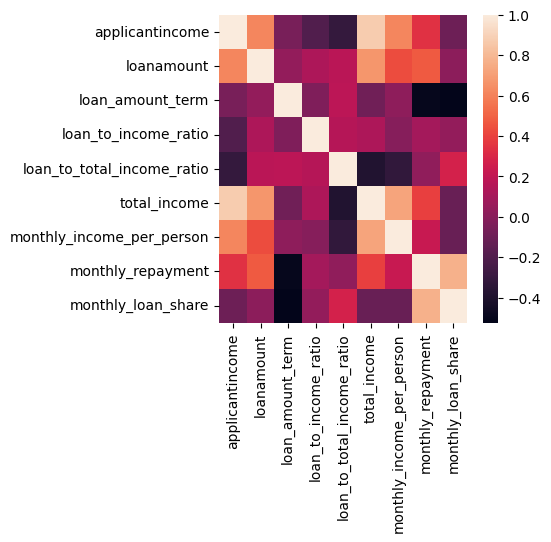

In [54]:
plt.figure(figsize=(4,4))
sns.heatmap(X_train[new_numeric_features].corr())
plt.show()

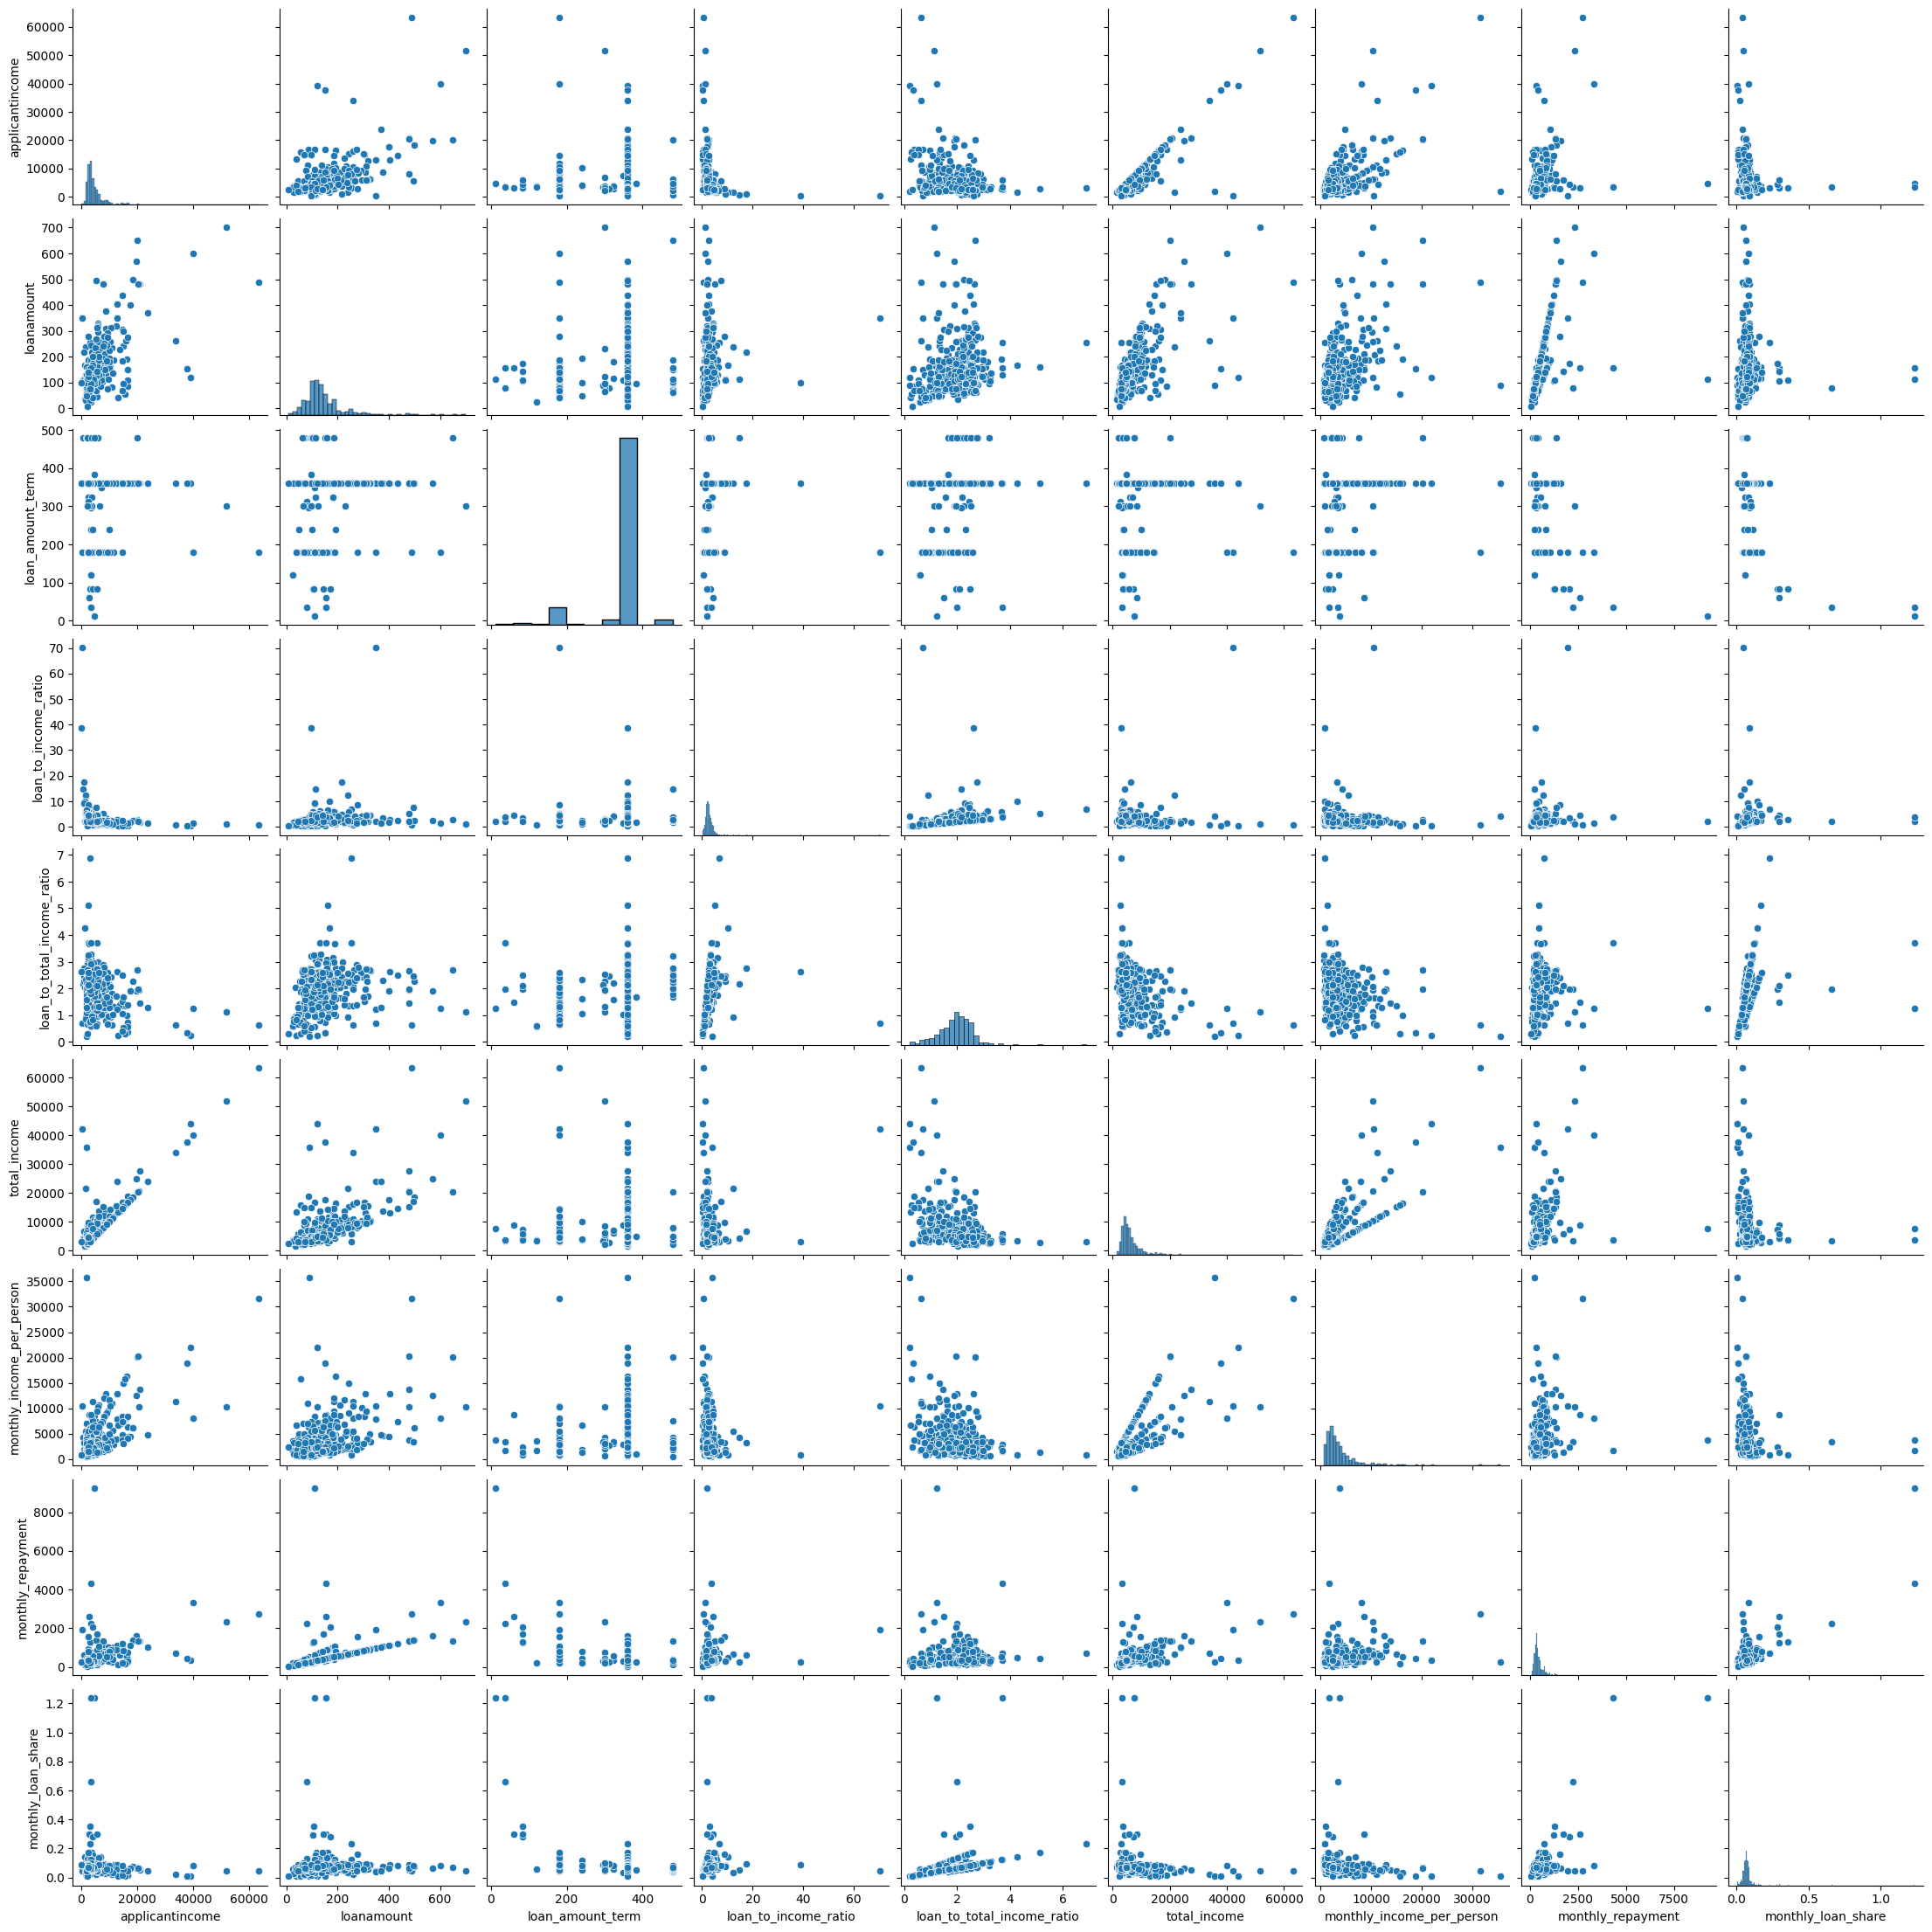

In [55]:
sns.pairplot(X_train[new_numeric_features],corner=False)

In [56]:
features_to_drop = ['applicantincome','loan_to_income_ratio','monthly_repayment','monthly_loan_share']
X_train = X_train.drop(features_to_drop,axis=1)
for feature in features_to_drop:
    if feature in new_numeric_features:
        new_numeric_features.remove(feature)

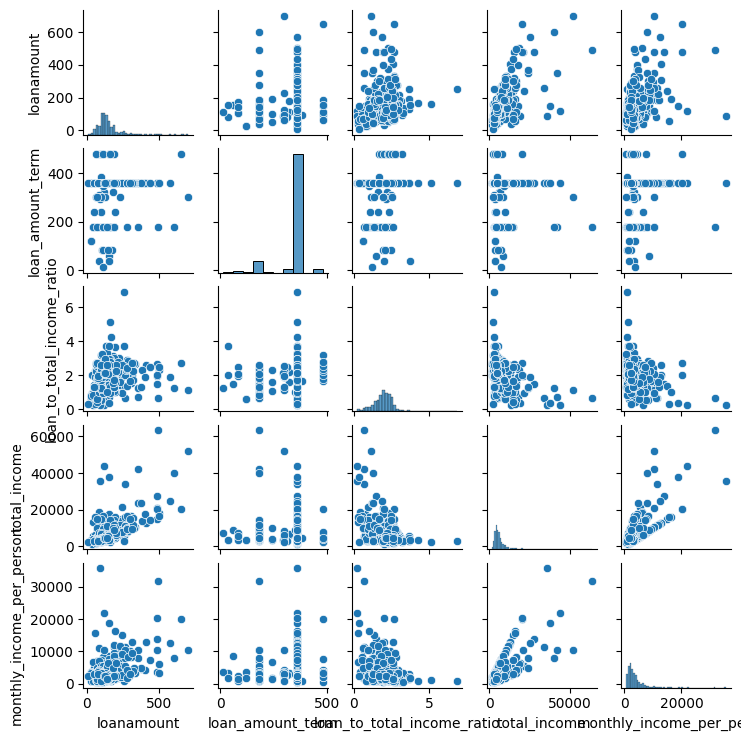

In [57]:
sns.pairplot(X_train[new_numeric_features],corner=False,height=1.5)
plt.show()

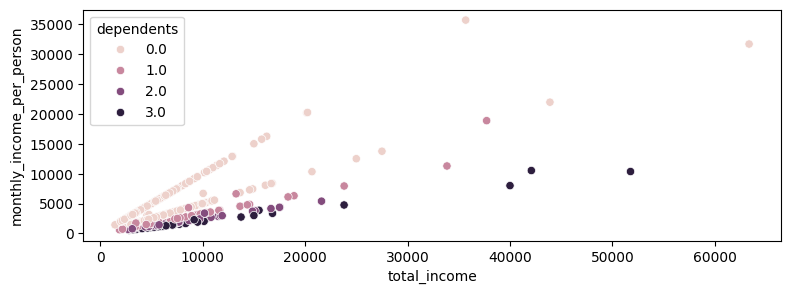

In [58]:
plt.figure(figsize=(9,3))
sns.scatterplot(X_train,x='total_income',y='monthly_income_per_person',hue='dependents')
plt.show()

Dependets and total_income seem to store the same information as total_income_per_person so we will have to drop it before fitting the model

In [59]:
new_numeric_features

['loanamount',
 'loan_amount_term',
 'loan_to_total_income_ratio',
 'total_income',
 'monthly_income_per_person']

<Axes: xlabel='monthly_income_per_person', ylabel='Probability'>

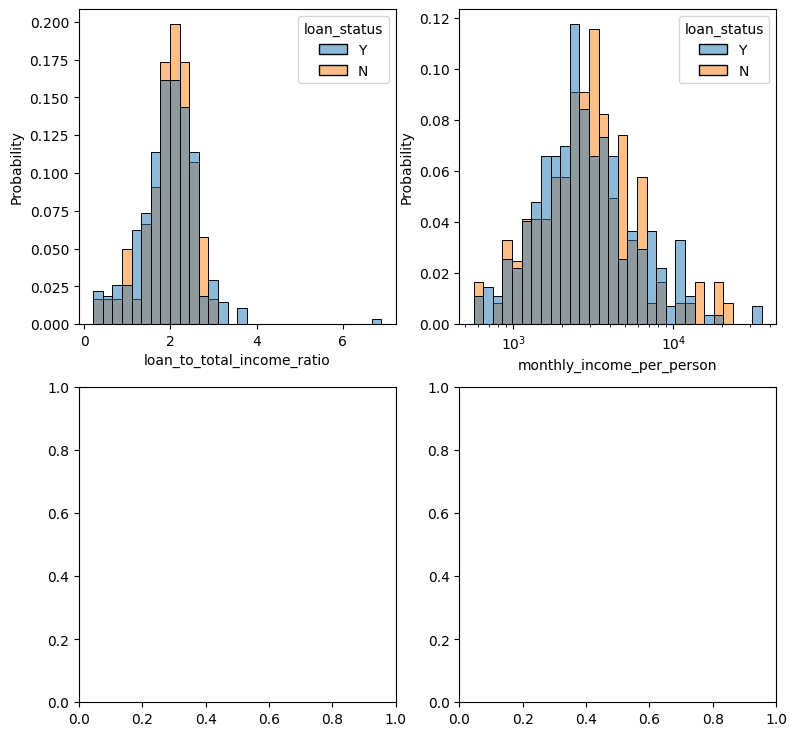

In [60]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(9,9))

sns.histplot(X_train,x='loan_to_total_income_ratio',
             stat='probability',hue=y_train,bins=30,ax=axes[0,0],common_norm=False)
sns.histplot(X_train,x='monthly_income_per_person',
             stat='probability',hue=y_train,bins=30,ax=axes[0,1],log_scale=True,common_norm=False)